## seaborn:直接利用底层方法Axes绘图

内容介绍：

* seaborn绘图函数，实际上使用了facegrid(如replot等)和axes(如strplot等)两种底层绘图技术。
* 因此，可以直接使用底层函数功能,对需要绘制的图像进行调节。
* 更详细的方法可以参考matplotlib的相关方法。
* seaborn绘图函数使用的底层方法(axes\facegrid)可以在官网中查看。

* FaceGrid,可以通过col,row等参数一次性构建多个图形。relplot/catplot/lmplot等函数底层都是使用FaceGrid技术。
* 凡是函数名中已经明确显示图形的类型，都直接使用的是Axes进行绘图。
* FaceGrid绘图的x,y必须是dateframe列名，并传入data参数。
* 直接使用Axes绘图，可以方便结合matplotlib使用。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#加载数据

In [2]:
# 网络加载官方案例数据
# tips = sns.load_dataset('tips')

#使用本地数据加载
df = pd.read_csv('seaborn-data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1.直接使用Axes绘图

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

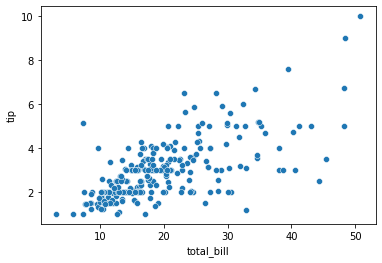

In [9]:
#scatterplot函数就是直接使用axes绘图，返回的对象是AxesSubplot
sns.scatterplot(x='total_bill', y='tip',data=df)

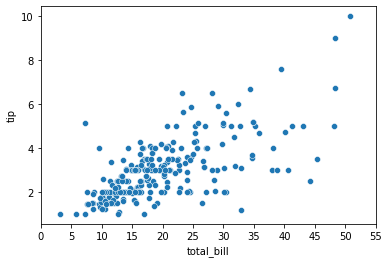

In [10]:
# 通过axes设置坐标轴刻度
axes2 = sns.scatterplot(x='total_bill', y='tip',data=df)
axes2.set_xticks(range(0,60,5))

### 2. 使用axes方法绘制多图

<AxesSubplot:xlabel='day', ylabel='total_bill'>

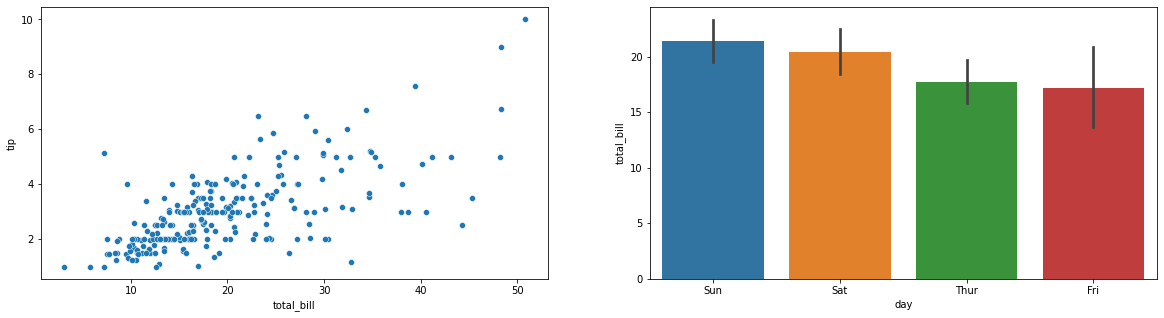

In [12]:
#绘制多图
fig, [ax1,ax2]=plt.subplots(1,2,figsize=(20,5))
#绘制第一张图
sns.scatterplot(x='total_bill', y='tip',data=df,ax=ax1)
#绘制第二张图
sns.barplot(y='total_bill', x='day',data=df,ax=ax2)

### 3.Axes方式绘图时，x,y参数可以直接传入数据序列

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

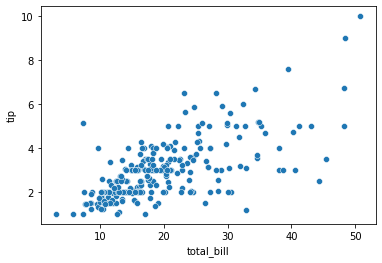

In [15]:
# Axes方式绘图(scatterplot函数等)，x,y参数可以直接传入数据。但facegrid方式(replot等)只能传入DateFrame数据列名的方式进行。
#x,y直接传入数据序列时，data参数不需要赋值。
sns.scatterplot(x=df['total_bill'],y=df['tip'])

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

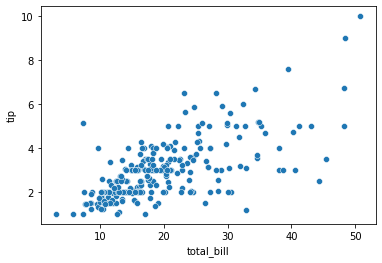

In [16]:
#也可混合传入x,y数据
sns.scatterplot(x=df['total_bill'],y='tip',data=df)